In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression #http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# new imports:
from itertools import combinations
from collections import defaultdict

/Users/Misrab/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('africa_ph.csv')
df.dropna(inplace=True)
predictors = ['ELEV', 'REF2', 'BSAN', 'LSTN', 'Infrared01', 'Infrared02', 'Infrared03', 'Infrared04', 'Infrared05']


### itertools combinations example

In [3]:
# how many elements?
# what is computational cost of computing all combos?
count = 0
for r in range(2, len(predictors)):
    for p in combinations(predictors, r=r):
        #print list(p)
        count +=1
print count

501


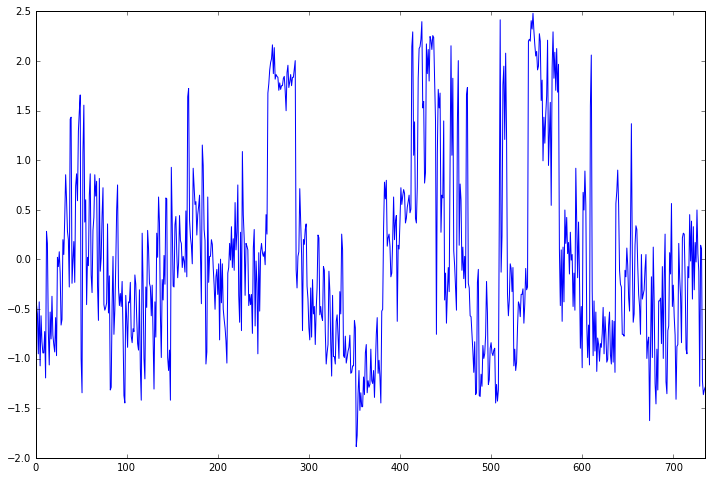

In [4]:
# this is the dependent variable we are predicting
df.pH.plot(figsize=(12,8))

In [17]:
# let's calculate the cross validation error for different subsets of features - this is brute force!
cv_errors = {}
for r in range(2, len(predictors)):
    # use itertools combinations to produce all combinations of features-- 
    # what is the computational complexity of this?
    # "n choose r", binomial coefficient
    for predictor_combos in combinations(predictors, r=r):
    	index_name = '_'.join([p for p in predictor_combos])
        X = df[list(predictor_combos)].values
        y = df["pH"].values
        kfold = KFold(len(df), n_folds=10)
        mses = []
        for train, test in kfold:
            # each model is cross validated 10 times
            Xtrain, ytrain, Xtest, ytest = X[train], y[train], X[test], y[test]   
            model = LinearRegression()
            model.fit(X, y)
            ypred = model.predict(Xtest)
            mses.append(mean_squared_error(ypred, ytest))
        cv_errors[index_name] = np.mean(mses)


In [19]:
cv_errors_df = pd.DataFrame.from_dict(cv_errors, orient='index')
cv_errors_df.columns = ['cv_error']
cv_errors_df['xaxis'] = [i for i,v in enumerate(cv_errors_df.index.values)]
cv_errors_df['predictors'] = cv_errors_df.index.values
cv_errors_df['num_predictors'] = cv_errors_df['predictors'].apply(lambda x: len(x.split('_')))
cv_errors_df = cv_errors_df.sort('num_predictors', ascending=False)
cv_errors_df.head()

/Users/Misrab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,cv_error,xaxis,predictors,num_predictors
ELEV_REF2_BSAN_LSTN_Infrared01_Infrared03_Infrared04_Infrared05,0.489431,439,ELEV_REF2_BSAN_LSTN_Infrared01_Infrared03_Infr...,8
ELEV_REF2_BSAN_LSTN_Infrared01_Infrared02_Infrared03_Infrared04,0.390480,287,ELEV_REF2_BSAN_LSTN_Infrared01_Infrared02_Infr...,8
ELEV_BSAN_LSTN_Infrared01_Infrared02_Infrared03_Infrared04_Infrared05,0.417298,221,ELEV_BSAN_LSTN_Infrared01_Infrared02_Infrared0...,8
ELEV_REF2_BSAN_LSTN_Infrared02_Infrared03_Infrared04_Infrared05,0.390990,320,ELEV_REF2_BSAN_LSTN_Infrared02_Infrared03_Infr...,8
REF2_BSAN_LSTN_Infrared01_Infrared02_Infrared03_Infrared04_Infrared05,0.389421,454,REF2_BSAN_LSTN_Infrared01_Infrared02_Infrared0...,8


/Users/Misrab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


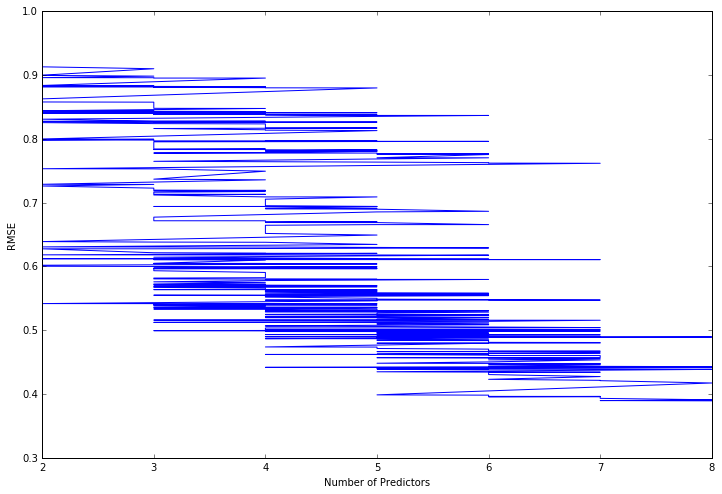

In [23]:
cv_sorted_df = cv_errors_df.sort('cv_error', ascending=False) # ['cv_error'].plot()
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(cv_sorted_df.num_predictors, cv_sorted_df.cv_error)
plt.xlabel("Number of Predictors")
plt.ylabel("RMSE")

# can you explain why the figure looks kind of weird? see the code, BE the code!

In [24]:
categories = np.unique(cv_errors_df['num_predictors'])
colors = np.linspace(1, 10, len(categories))
colordict = dict(zip(categories, colors))
cv_errors_df["color"] = cv_errors_df['num_predictors'].apply(lambda x: colordict[x])

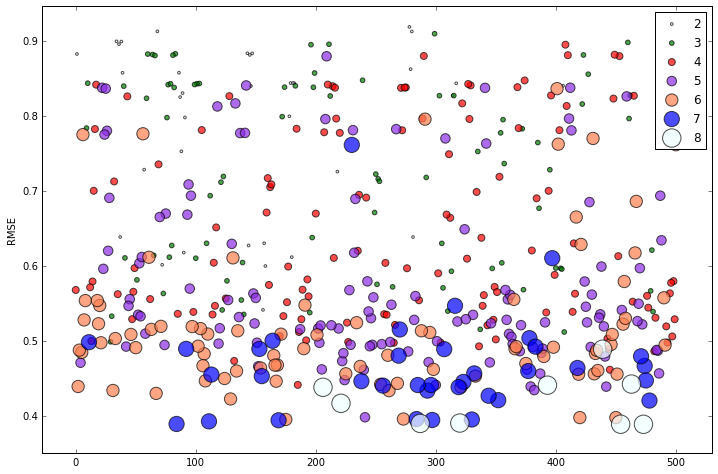

In [9]:
colors = ['#F0F8FF', 'g', 'r', '#8A2BE2', '#FF7F50', 'b', '#F0FFFF']
categories = np.unique(cv_errors_df['num_predictors'])
#colors = np.linspace(0, 3, len(categories))
colordict = dict(zip(categories, colors))
cv_errors_df["color"] = cv_errors_df['num_predictors'].apply(lambda x: x/10.0)
fig, ax = plt.subplots(figsize=(12, 8))
groups = cv_errors_df.groupby('num_predictors')
# Plot
fig.figsize=(12,8)
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.scatter(group.xaxis, group.cv_error, alpha=0.7, c=colors[name-2], s=group.num_predictors**2.8, label=name, cmap=plt.cm.coolwarm)
    #ax.plot(group.xaxis, group.cv_error, marker='o', linestyle='', alpha=0.7, ms=7, label=name)
ax.set_ylabel('RMSE')
ax.legend(scatterpoints=1)
plt.show()

# Can you reason about WHAT it is that we're plotting here?
# TODO - explain it in your own words here...

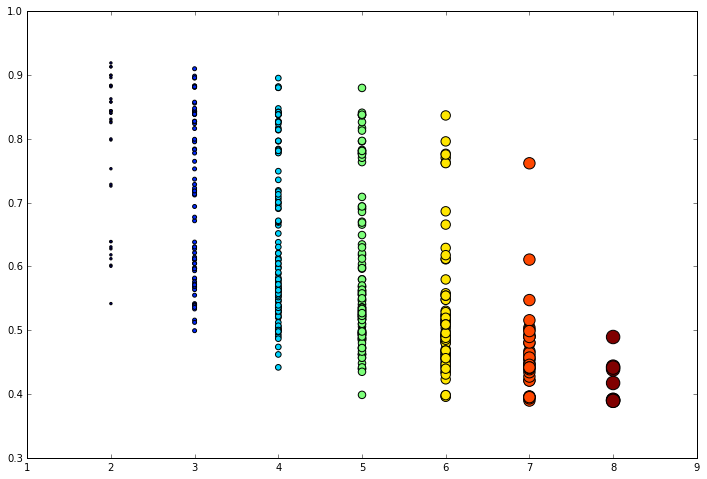

In [25]:
fig, ax = plt.subplots(figsize=(12, 8))
dd = plt.scatter(cv_errors_df.num_predictors, cv_errors_df.cv_error, c=cv_errors_df.color, s=cv_errors_df.num_predictors**2.5, label=cv_errors_df.num_predictors)

# Some different ways to visualise - which do you like most?

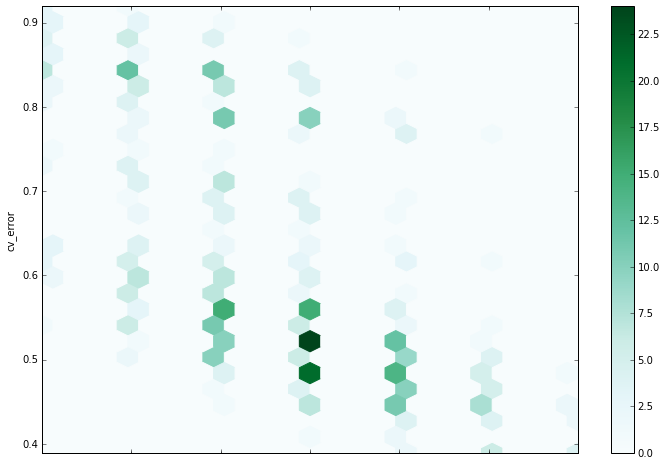

In [11]:
cv_errors_df.plot(kind='hexbin', x='num_predictors', y='cv_error', gridsize=25, figsize=(12,8))

## Compare with another Subset Selection Method

In [12]:
# example using sklearn built-in combination generator
X = df[predictors]
y = df["pH"]
reg = LinearRegression()
reg.fit(X, y)
ypred = reg.predict(X)
np.sqrt(mean_squared_error(ypred, y))

0.6205816777871408

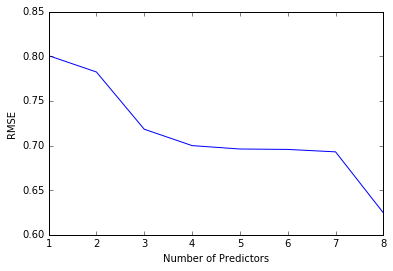

In [13]:
mean_sq_errors = []
nfeatures = range(1, len(predictors))
for nfeature in nfeatures:
    # compute MSE for different values of k (top features)
    selector = SelectKBest(f_regression, k=nfeature) # This is VERY handy!
    selector.fit(X, y)
    selected = selector.get_support()
    feats = [col for (col,sel) in zip(predictors, selected) if sel]
    reg = LinearRegression()
    X_r = df[feats]
    reg.fit(X_r, y)
    ypred = reg.predict(X_r)
    mean_sq_errors.append(np.sqrt(mean_squared_error(ypred, y)))
plt.plot(nfeatures, mean_sq_errors)
plt.xlabel("Number of Predictors")
plt.ylabel("RMSE")

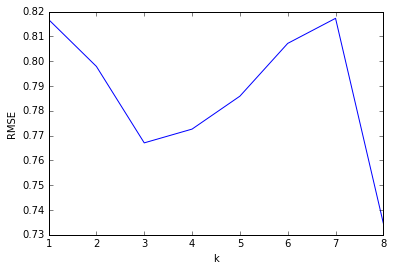

In [14]:
# TODO - finally, a task! Do the same as the above, but calculating what we really want, 
# which is cross validation error...
cv_errors = []
# kfold = ...
# nfeatures = range(...)
for nfeature in nfeatures:
    # build model with varying number of features
#     selector = ...
    # fit ...
    selected = selector.get_support()
    feats = [col for (col,sel) in zip(predictors, selected) if sel]
    X_r = df[feats].values
    y = df["pH"].values
    rmses = []
    for train, test in kfold:
        # each model is cross validated 10 times
#         Xtrain, ytrain, Xtest, ytest = ... 
        reg = LinearRegression()
        reg.fit(Xtrain, ytrain)
        ypred = reg.predict(Xtest)
        rmses.append(np.sqrt(mean_squared_error(ypred, ytest)))
    cv_errors.append(np.mean(rmses))
plt.plot(nfeatures, cv_errors)
plt.xlabel("k")
plt.ylabel("RMSE")